In [1]:
import pandas
df = pandas.read_excel('D:\house_price_regression.xlsx')
df.head()

,Unnamed: 0,url,title,age,area,floor_info,direction,layout,price
0,0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",建筑年代：1998\r\n,65,中层(共6层)\r\n,南北向\r\n,\r\n 2室1厅\r\n ...,3500000
1,1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",建筑年代：1996\r\n,90,低层(共6层)\r\n,南北向\r\n,\r\n 3室2厅\r\n ...,5000000
2,2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,建筑年代：1998\r\n,72,低层(共6层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,3980000
3,3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",建筑年代：2006\r\n,96,高层(共7层)\r\n,南北向\r\n,\r\n 2室2厅\r\n ...,5500000
4,4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",建筑年代：1996\r\n,86,中层(共7层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,4500000


## 房屋数据预处理

In [28]:
df['age'] = df['age'].map(lambda e: 2021 - int(e.strip().strip('建筑年代：')))
df[['room','living_room']] = df['layout'].str.extract('(\d+)室(\d+)厅')
df['room'] = df['room'].astype(int)
df['living_room'] = df['living_room'].astype(int)
df['total_floor'] = df['floor_info'].str.extract('共(\d+)层')
df['total_floor'] = df['total_floor'].astype(int)
df['floor'] = df['floor_info'].str.extract('^(.)层')
df['direction'] = df['direction'].map(lambda e: e.strip())

In [29]:
del df['layout']
del df['floor_info']
del df['title']
del df['url']

In [30]:
del df['Unnamed: 0']

In [31]:
df.head()

,age,area,direction,price,room,living_room,total_floor,floor
0,23,65,南北向,3500000,2,1,6,中
1,25,90,南北向,5000000,3,2,6,低
2,23,72,南向,3980000,2,1,6,低
3,15,96,南北向,5500000,2,2,7,高
4,25,86,南向,4500000,2,1,7,中


In [33]:
df = pandas.concat([df,pandas.get_dummies(df['direction']), pandas.get_dummies(df['floor'])], axis=1)
del df['direction']
del df['floor']
del df['南北向']
del df['低']

In [34]:
df

,age,area,price,room,living_room,total_floor,东南向,东向,南向,西南向,西向,中,高
0,23,65,3500000,2,1,6,0,0,0,0,0,1,0
1,25,90,5000000,3,2,6,0,0,0,0,0,0,0
2,23,72,3980000,2,1,6,0,0,1,0,0,0,0
3,15,96,5500000,2,2,7,0,0,0,0,0,0,1
4,25,86,4500000,2,1,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,18,92,5000000,2,2,24,0,0,0,0,0,1,0
2788,19,136,9400000,3,2,11,0,0,0,0,0,0,1
2789,16,125,5500000,3,2,16,0,0,0,0,0,0,1
2790,18,108,7410000,2,2,18,0,0,1,0,0,1,0


## 绘制散布图

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='area', ylabel='price'>

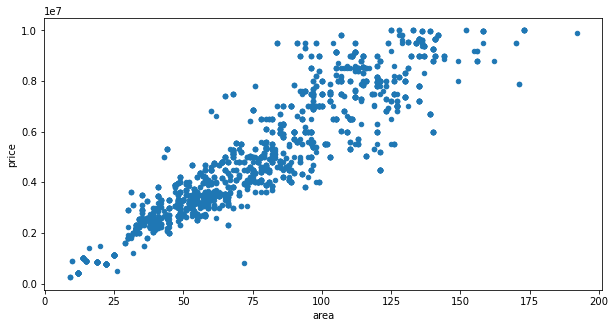

In [35]:
%pylab inline
df[['price','area']].plot(kind='scatter',x='area',y='price',figsize=[10,5])

## 建立回归线分析价格与面积的关系

In [44]:
X = df[['area']]
y = df['price']

In [45]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

In [46]:
print('Coefficient:{}'.format(regr.coef_))
print('Intercept:{}'.format(regr.intercept_))

Coefficient:[64846.01038065]
Intercept:-9165.21745733358


Text(0, 0.5, 'price')

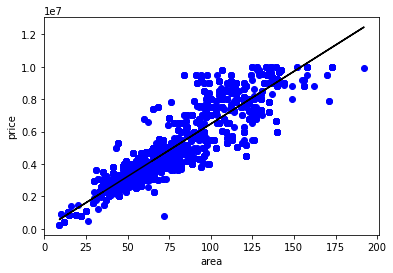

In [47]:
plt.scatter(X,y, color='blue')
plt.plot(X, regr.predict(X), color='black')
plt.xlabel('area')
plt.ylabel('price')

## 多元回归预测

In [48]:
y = df['price'].values
X = df[['age','area','room','living_room','total_floor','东南向','东向','南向','西南向','西向','中','高']]

In [50]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

In [51]:
X.info

<bound method DataFrame.info of       age  area  room  living_room  total_floor  东南向  东向  南向  西南向  西向  中  高
0      23    65     2            1            6    0   0   0    0   0  1  0
1      25    90     3            2            6    0   0   0    0   0  0  0
2      23    72     2            1            6    0   0   1    0   0  0  0
3      15    96     2            2            7    0   0   0    0   0  0  1
4      25    86     2            1            7    0   0   1    0   0  1  0
...   ...   ...   ...          ...          ...  ...  ..  ..  ...  .. .. ..
2787   18    92     2            2           24    0   0   0    0   0  1  0
2788   19   136     3            2           11    0   0   0    0   0  0  1
2789   16   125     3            2           16    0   0   0    0   0  0  1
2790   18   108     2            2           18    0   0   1    0   0  1  0
2791   25    35     1            0            6    0   0   1    0   0  0  1

[2792 rows x 12 columns]>

## 评估回归模型

In [53]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1319.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:17:06   Log-Likelihood:                -42320.
No. Observations:                2792   AIC:                         8.467e+04
Df Residuals:                    2779   BIC:                         8.474e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.643e+04   1.12e+05     -0.325      

In [56]:
predictorcols = ['age', 'area', 'room', 'living_room', 'total_floor', '东南向', '东向', '南向', '西南向', '西向', '中', '高']
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictorcols = X[list(variables)]
        predictorcols2 = sm.add_constant(predictorcols)
        est = sm.OLS(y, predictorcols)
        res = est.fit()
        AICs[variables] = res.aic

In [58]:
from collections import Counter
c = Counter(AICs)
c.most_common()

[(('东向',), 94567.53510815016),
 (('西南向',), 94566.53707240011),
 (('西向',), 94564.47084448887),
 (('东南向',), 94551.16301791837),
 (('高',), 93491.96381531178),
 (('中',), 93367.86191792344),
 (('南向',), 93179.91145024315),
 (('age',), 91667.68921456214),
 (('total_floor',), 90835.88264550385),
 (('room',), 88417.9323391738),
 (('living_room',), 88144.11804993184),
 (('area',), 84981.8845029108)]